<a href="https://colab.research.google.com/github/leolatini/Mentoria/blob/master/Copia_de_Copia_de_Recomendando_Papers_Aprendizaje_No_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recomendando Papers - Aprendizaje No Supervisado

En este practico se explorar ́an diferentes soluciones de clustering

In [0]:
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from nltk.tokenize import word_tokenize

## Carga de datos

In [0]:
## Cargamos el dataset original

url='https://www.dropbox.com/s/q8am1p40irfrq9c/arxiv_dataset.csv?dl=1'
df=pd.read_csv(url,sep=';',dtype={'Id': object},parse_dates=['Created'])

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
def tokenize_only(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []

    for token in tokens:
        if re.search('[a-zA-Z]', token):
         if token[0] not in ["\\","'","-"]:
          if len(token)>2: #eliminar palabras cortas
            filtered_tokens.append(token)
    return filtered_tokens

In [0]:
text = df.loc[0,'Title']
tokens = tokenize_only(text)
print(tokens)

['post-lie', 'algebra', 'structures', 'the', 'witt', 'algebra']


## Vectorización de los Abstracts


A continuación realizaremos la vectorización de los datos utilizando TfidfVectorizer, pueden modificar los parámetros segun mejor les parezca.

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8,strip_accents="unicode", lowercase=True, max_features=1000,
                                 min_df=50, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_only, 
                                   ngram_range=(1,2))

#(max_features=500, max_df=0.9, lowercase=True, token_pattern='[a-zA-Z]{4,}',stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(df['Title']) #fit the vectorizer to synopses
print(tfidf_matrix.shape)

terms = tfidf_vectorizer.get_feature_names()

(229448, 1000)


veremos los terminos utilizados por el algoritmo y de ser necesario ajustaremos los parámetros

In [0]:
terms

['+\\frac',
 '+\\infty',
 '.the',
 '/\\mathbb',
 '/\\mathrm',
 '/\\sqrt',
 '/fe',
 '/l_',
 '/m_',
 '/yr',
 '0\\le',
 '0\\leq',
 '1+\\epsilon',
 '1+\\frac',
 '1+\\varepsilon',
 '1+o',
 '1+z',
 '1-\\alpha',
 '1-\\epsilon',
 '1-\\frac',
 '1-\\varepsilon',
 '1-bit',
 '1-d',
 '1-dimensional',
 '1-form',
 '1-loop',
 '1-x',
 '1/\\epsilon',
 '1/\\sqrt',
 '1/f',
 '1/k',
 '1/n',
 '1/p',
 '1/r',
 '1/t',
 '10-fold',
 '100k',
 '10x',
 '12co',
 '13co',
 '170817a',
 '1960s',
 '1970s',
 '1980s',
 '1990s',
 '19th',
 '1\\le',
 '1\\leq',
 '1\\sigma',
 '1st',
 '2-d',
 '2-dimensional',
 '2-point',
 '2-sphere',
 '2-x',
 '20th',
 '21-cm',
 '21cm',
 '2\\leq',
 '2\\pi',
 '2\\sigma',
 '2\\sqrt',
 '2\\times',
 '2^n',
 '2deg',
 '2hdm',
 '2k+1',
 '2mass',
 '2n+1',
 '2n-1',
 '2nd',
 '2x2',
 '3-d',
 '3-dimensional',
 '3-fold',
 '3-manifold',
 '3-manifolds',
 '3-point',
 '3-space',
 '3-sphere',
 '3\\sigma',
 '3\\times',
 '3gpp',
 '3rd',
 '4-dimensional',
 '4-manifold',
 '4-manifolds',
 '4-point',
 '4\\pi',
 '4\\times

## Recomendación basada en contenido - Similaridad
Para implementar el recomendador basado en contenido utilizaremos la similaridad del coseno entre los resumenes de los artículos.

In [0]:

from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix[:20000],tfidf_matrix[:20000])

In [0]:
Titles = df.Title
Abstract = df.Abstract

for i in range(1000):
 for j in range(1000):
  if j>i :
   if cosine_sim[i, j]>0.6:
    print(i,Titles[i])
    print(j,Titles[j])
    print("cosine similarity: %r" %cosine_sim[i, j])
    print('=' * 60)

0 Post-Lie algebra structures on the Witt algebra
969 The Aluffi Algebra of a hypersurface with isolated singularity
cosine similarity: 0.911856789777892
1 Analysis of a remarkable singularity in a nonlinear DDE
338 Analysis of Framelet Transforms on a Simplex
cosine similarity: 0.6459084757581323
1 Analysis of a remarkable singularity in a nonlinear DDE
473 Multiharmonic analysis for nonlinear acoustics with different scales
cosine similarity: 0.7186000936383161
4 Vexillary degeneracy loci classes in K-theory and algebraic cobordism
298 Dihedral Transportation and (0,1)-Matrix Classes
cosine similarity: 0.7193985957680731
7 On semilattices and lattices for families of theories
646 Mad families and non-meager filters
cosine similarity: 0.6163631009645206
8 Construction and Encoding of QC-LDPC Codes Using Group Rings
20 Some Repeated-Root Constacyclic Codes over Galois Rings
cosine similarity: 0.6871055547042593
13 Subregular subalgebras and invariant generalized complex structures on
 

Definan la función "recomendations" que debe tener como input un string y devolver los 20 papers mas "cercanos" con respecto a la similaridad del coseno.

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

Titles = df.Title
Abstract = df.Abstract


#def recommendations(title):
#    return df

def recommendations(title):
    return df[df['title'].str.contains(title)]['title'].tolist()

df_idx = dict(zip(df['title'], list(df.index)))
title = recommendations('mathematic')[0]
n_recommendations = 5

idx = df_idx[title]
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:(n_recommendations+1)]
similar_papers = [i[0] for i in sim_scores]

print("Recomendaciones para {}:".format(title))
for paper in df['title'].iloc[similar_papers]:
    print("\t{}".format(paper))

## Clustering
 Realizar clustering de los datos (algoritmo K-means), con distintas cantidades de clusters, determinar algun valor optimo. Analizar la medida de pureza https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html

​

In [0]:
from sklearn.cluster import KMeans

In [0]:
kmedias3=KMeans(n_clusters=3).fit(tfidf_matrix[:3000])
print(kmedias3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [0]:
X=tfidf_matrix[:3000]

In [0]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [0]:
pca=PCA(n_components=2)

In [0]:
pca.fit(X.toarray())

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
pca.transform(X[y_km == 0, :].toarray())[:,0]

array([0.01588946, 0.10980647, 0.02850242, ..., 0.05694909, 0.06248907,
       0.07858785])

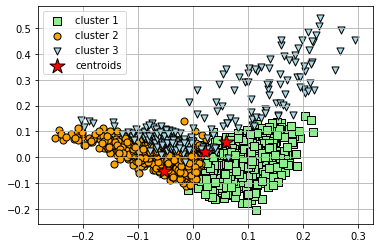

In [0]:
km = kmedias3 #.fit(X)
y_km = kmedias3.predict(X)
# plot the 3 clusters
plt.scatter(
   pca.transform(X[y_km == 0, :].toarray())[:,0], pca.transform(X[y_km == 0, :].toarray())[:,1],
   s=50, c='lightgreen',
   marker='s', edgecolor='black',
   label='cluster 1'
)
plt.scatter(
   pca.transform(X[y_km == 1, :].toarray())[:,0], pca.transform(X[y_km == 1, :].toarray())[:,1],
   s=50, c='orange',
   marker='o', edgecolor='black',
   label='cluster 2'
)
plt.scatter(
   pca.transform(X[y_km == 2, :].toarray())[:,0], pca.transform(X[y_km == 2, :].toarray())[:,1],
   s=50, c='lightblue',
   marker='v', edgecolor='black',
   label='cluster 3'
)
# plot the centroids
plt.scatter(
   pca.transform(km.cluster_centers_)[:,0], pca.transform(km.cluster_centers_)[:,0],
   s=250, marker='*',
   c='red', edgecolor='black',
   label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [0]:
km.cluster_centers_[0,:]

array([9.74254697e-05, 1.04421195e-03, 0.00000000e+00, ...,
       0.00000000e+00, 2.09447167e-04, 0.00000000e+00])

In [0]:
X[y_km == 0, 0]

<1281x1 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

## Análisis de Clusters

Analicen los clusters, tamaño de cada uno.
Muestren los terminos mas frecuentes para cada cluster y los papers mas cercanos a cada centroide.
Pueden utilizar las columnas fields o categories para determinar anslizar los clusters. Coinciden los clusters con alguna subclasificacion de los datos?